 Lab 7: Visualizing Tree Data

1. Node-Link Tree Diagram (Organizational Structure)

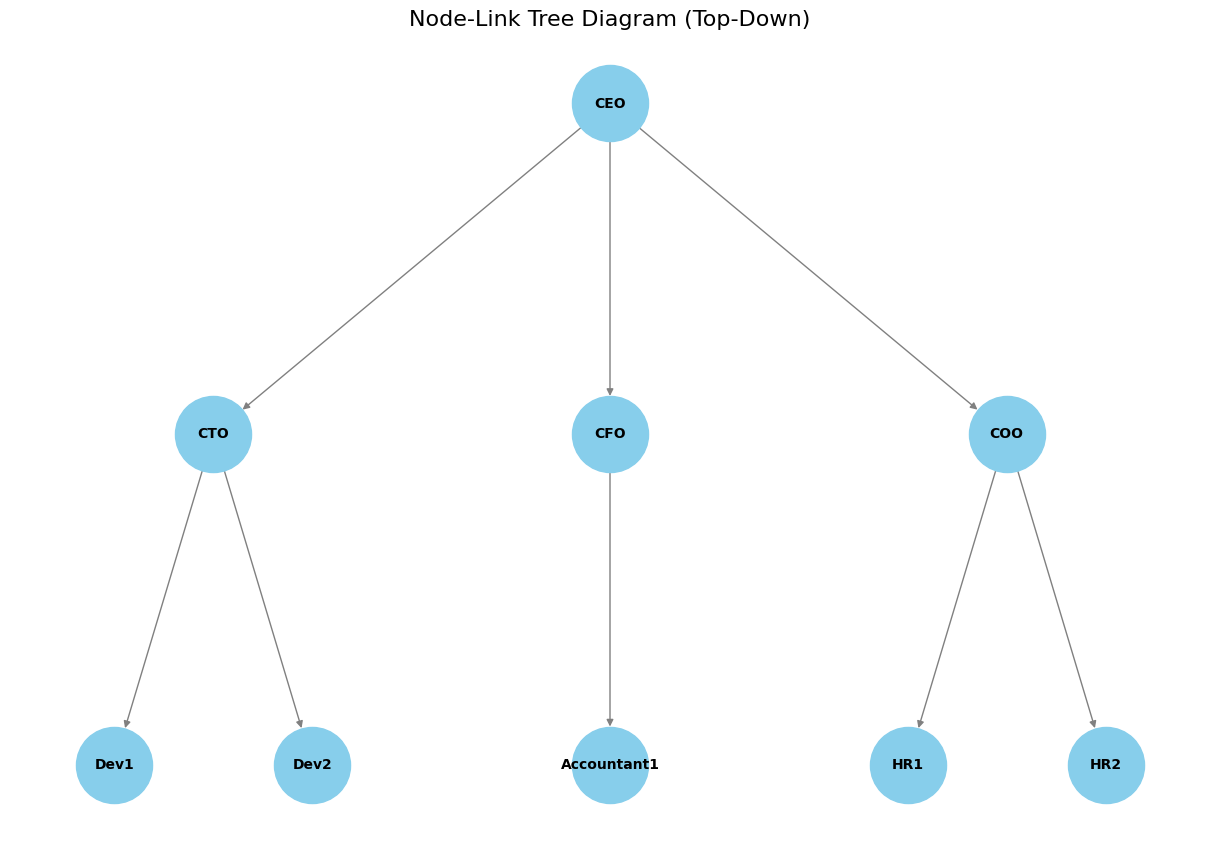

In [2]:
import matplotlib.pyplot as plt
import networkx as nx

# Define a tree as a directed graph
G = nx.DiGraph()

# Add edges to represent hierarchy
G.add_edges_from([
    ('CEO', 'CTO'),
    ('CEO', 'CFO'),
    ('CEO', 'COO'),
    ('CTO', 'Dev1'),
    ('CTO', 'Dev2'),
    ('CFO', 'Accountant1'),
    ('COO', 'HR1'),
    ('COO', 'HR2')
])

# Tree layout function (top-down)
def hierarchy_pos(G, root, width=1., vert_gap=0.2, vert_loc=0, xcenter=0.5):
    pos = {}

    def _hierarchy_pos(G, root, left, right, vert_loc, xcenter, pos):
        pos[root] = (xcenter, vert_loc)
        children = list(G.successors(root))
        if len(children) != 0:
            dx = (right - left) / len(children)
            nextx = left + dx / 2
            for child in children:
                pos = _hierarchy_pos(G, child, nextx - dx / 2, nextx + dx / 2,
                                     vert_loc - vert_gap, nextx, pos)
                nextx += dx
        return pos

    return _hierarchy_pos(G, root, 0, width, vert_loc, xcenter, pos)

# Define position
pos = hierarchy_pos(G, root='CEO')

# Draw graph
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue',
        edge_color='gray', font_size=10, font_weight='bold')
plt.title("Node-Link Tree Diagram (Top-Down)", fontsize=16)
plt.axis('off')
plt.show()


2. Indented Tree (AST Visualization)

In [3]:
# Define a simple tree node class
class TreeNode:
    def __init__(self, value, children=None):
        self.value = value
        self.children = children or []

# Build the AST tree manually
root = TreeNode("-",
    [
        TreeNode("+", [TreeNode("1"), TreeNode("2")]),
        TreeNode("*", [
            TreeNode("3"),
            TreeNode("+", [
                TreeNode("/", [TreeNode("7"), TreeNode("4")]),
                TreeNode("-", [TreeNode("5"), TreeNode("7")])
            ])
        ])
    ]
)

# Recursive function to print indented tree
def print_tree(node, indent=""):
    print(indent + str(node.value))
    for i, child in enumerate(node.children):
        # For nicer visual indentation, use ├── for all but last child, and └── for last
        prefix = "├── " if i < len(node.children) - 1 else "└── "
        print_tree(child, indent + prefix)

# Print the tree
print_tree(root)


-
├── +
├── ├── 1
├── └── 2
└── *
└── ├── 3
└── └── +
└── └── ├── /
└── └── ├── ├── 7
└── └── ├── └── 4
└── └── └── -
└── └── └── ├── 5
└── └── └── └── 7


3. Tree Map

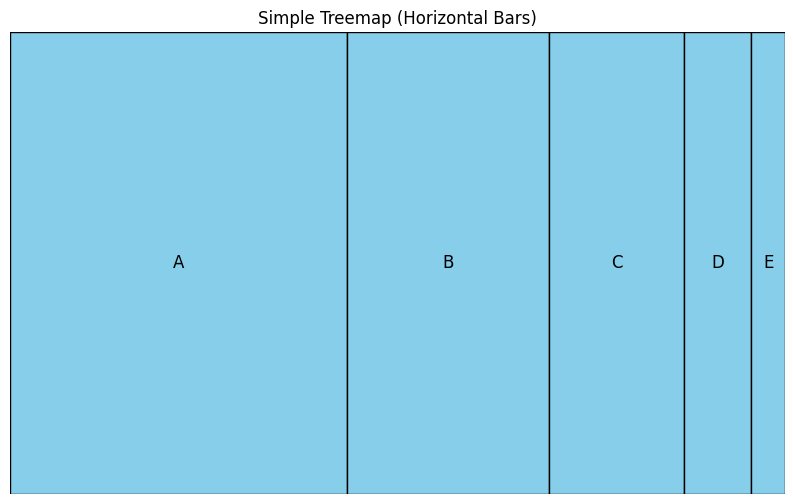

In [4]:
import matplotlib.pyplot as plt

# Example data (labels, sizes)
labels = ['A', 'B', 'C', 'D', 'E']
sizes = [500, 300, 200, 100, 50]

# Normalize sizes for relative rectangle sizes
total_size = sum(sizes)
sizes_norm = [size / total_size for size in sizes]

fig, ax = plt.subplots(figsize=(10, 6))

# Parameters for layout
x = 0
y = 0
height = 1

# Draw rectangles side by side
for label, size_norm in zip(labels, sizes_norm):
    width = size_norm * 10  # scale width (arbitrary)
    rect = plt.Rectangle((x, y), width, height, edgecolor='black', facecolor='skyblue')
    ax.add_patch(rect)
    ax.text(x + width / 2, y + height / 2, label, ha='center', va='center', fontsize=12)
    x += width

ax.set_xlim(0, 10)
ax.set_ylim(0, 1)
ax.axis('off')
plt.title('Simple Treemap (Horizontal Bars)')
plt.show()
